# Fake News Detection

## Importing required library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as m
import itertools
from sklearn.metrics import plot_confusion_matrix
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

In [4]:
print(len(df_fake))
df_fake.drop(df_fake.tail(13400).index, inplace = True)
df_fake

23481


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
10076,ALT-LEFT PLANS TO HIJACK PRESIDENT TRUMP’S AZ ...,The pieces are in place ahead of President Don...,politics,"Aug 22, 2017",0
10077,WATCH: LOUIE GOHMERT Wants LYING Democrat VA G...,Why did the Democrat VA Governor throw gasolin...,politics,"Aug 22, 2017",0
10078,PATRIOT ARTIST’S LATEST TRIBUTE TO TRUMP SUPPO...,Patriot artist John McNaughton just revealed h...,politics,"Aug 21, 2017",0
10079,CHELSEA CLINTON Uses “Lucifer” To Support Argu...,Chelsea Clinton thought she was quite clever w...,politics,"Aug 21, 2017",0


In [5]:
print(len(df_true))
df_true.drop(df_true.tail(11400).index, inplace = True)
df_true

21417


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
10012,New Jersey's Christie loses bid to freeze Atla...,ATLANTIC CITY (Reuters) - A New Jersey judge o...,politicsNews,"April 8, 2016",1
10013,Leak of Senate encryption bill prompts swift b...,WASHINGTON (Reuters) - Security researchers an...,politicsNews,"April 8, 2016",1
10014,Papal official denies report Sanders invited h...,VATICAN CITY/WASHINGTON (Reuters) - U.S. Democ...,politicsNews,"April 8, 2016",1
10015,Bill Clinton confronts protesters who say his ...,NEW YORK (Reuters) - Former President Bill Cli...,politicsNews,"April 7, 2016",1


In [6]:
df_fake.shape, df_true.shape

((10081, 5), (10017, 5))

## Merging Fake news and true news

In [7]:
df = pd.concat([df_fake, df_true], axis =0 )
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
10012,New Jersey's Christie loses bid to freeze Atla...,ATLANTIC CITY (Reuters) - A New Jersey judge o...,politicsNews,"April 8, 2016",1
10013,Leak of Senate encryption bill prompts swift b...,WASHINGTON (Reuters) - Security researchers an...,politicsNews,"April 8, 2016",1
10014,Papal official denies report Sanders invited h...,VATICAN CITY/WASHINGTON (Reuters) - U.S. Democ...,politicsNews,"April 8, 2016",1
10015,Bill Clinton confronts protesters who say his ...,NEW YORK (Reuters) - Former President Bill Cli...,politicsNews,"April 7, 2016",1


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [9]:
df = df.drop(["title", "subject","date"], axis = 1)

In [10]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
10012,ATLANTIC CITY (Reuters) - A New Jersey judge o...,1
10013,WASHINGTON (Reuters) - Security researchers an...,1
10014,VATICAN CITY/WASHINGTON (Reuters) - U.S. Democ...,1
10015,NEW YORK (Reuters) - Former President Bill Cli...,1


## Randomly shuffling the df

In [11]:
df = df.sample(frac = 1)

In [12]:
df

,text,class
3994,This is hypocrisy of the highest order and pro...,0
7723,A mother describing herself as extremely reli...,0
1935,Disgraced former National Security Adviser Mic...,0
6054,The media is reporting that Donald Trump and H...,0
7394,"On Sunday s edition of Meet The Press, Senator...",0
...,...,...
7918,WASHINGTON (Reuters) - Confronted by Russia in...,1
5184,WASHINGTON (Reuters) - Senior Cabinet members ...,1
5557,WASHINGTON (Reuters) - U.S. President Donald T...,1
3276,Donald Trump must be feeling pretty damn humil...,0


## Check Duplicates

In [13]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape

(20044, 2)

## Checking Missing values


In [14]:
# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

text     0
class    0
dtype: int64

## Reset the index

In [15]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [16]:
df

,text,class
0,This is hypocrisy of the highest order and pro...,0
1,A mother describing herself as extremely reli...,0
2,Disgraced former National Security Adviser Mic...,0
3,The media is reporting that Donald Trump and H...,0
4,"On Sunday s edition of Meet The Press, Senator...",0
...,...,...
20039,WASHINGTON (Reuters) - Confronted by Russia in...,1
20040,WASHINGTON (Reuters) - Senior Cabinet members ...,1
20041,WASHINGTON (Reuters) - U.S. President Donald T...,1
20042,Donald Trump must be feeling pretty damn humil...,0


## Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["text"] = df["text"].apply(wordopt)

In [19]:
df

,text,class
0,this is hypocrisy of the highest order and pro...,0
1,a mother describing herself as extremely reli...,0
2,disgraced former national security adviser mic...,0
3,the media is reporting that donald trump and h...,0
4,on sunday s edition of meet the press senator...,0
...,...,...
20039,washington reuters confronted by russia in...,1
20040,washington reuters senior cabinet members ...,1
20041,washington reuters u s president donald t...,1
20042,donald trump must be feeling pretty damn humil...,0


## Remove Stop words and stemming

In [20]:
ps = PorterStemmer()

In [21]:
def stemming_and_stopwords(text):
    
    # Remove stopwords and tokenization
    clean_words = [word for word in text.split() if word not in stopwords.words('english')]
    
    # Stemming
    for i in range(len(clean_words)):
        clean_words[i] = ps.stem(clean_words[i])

    return clean_words

### Defining dependent and independent variable as x and y

In [22]:
x = df["text"]
y = df["class"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
print(x_train.shape)
print(y_train.shape)

(15033,)
(15033,)


In [25]:
print(x_test.shape)
print(y_test.shape)

(5011,)
(5011,)


## Converting text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorization = TfidfVectorizer(analyzer=stemming_and_stopwords)
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [28]:
print(type(xv_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [29]:
print(xv_test.shape)

(5011, 44596)


In [30]:
xv_test[0]

<1x44596 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

## Confusion Matrix


In [31]:
def confusion_mat(Y_test, pred):
    TN = 0
    TP=0
    FN=0
    FP=0
    

    for i in range(len(Y_test)):
        
        if pred[i] == 0 and Y_test[i] == 0:
            TN=TN+1
        elif pred[i] == 1 and Y_test[i] == 1:
            TP=TP+1
        elif pred[i] == 1 and Y_test[i] == 0:
            FP=FP+1
        else:
            FN=FN+1
    
    return TN,TP,FN,FP

In [32]:
def accuracy_score(TN,TP,FN,FP):
    total = TN+TP+FN+FP
    return (TN+TP)/total


def precision_score(TN,TP,FN,FP):
    return TP/(TP+FP)


def recall_score(TN,TP,FN,FP):
    return TP/(TP+FN)


def f1_score(TN,TP,FN,FP):
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return  2*p*r/(p+r)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
accuracy = m.accuracy_score(y_test, pred_lr)
accuracy

0.9876272201157453

In [37]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_lr)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  2466
False Positive  35
False Negative  27
True Positive  2483


In [38]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9876272201157453
PRECISION  :  0.9861000794281175
RECALL     :  0.9892430278884462
F1_SCORE :  0.9876690533015114


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_lr)

array([[2466,   35],
       [  27, 2483]], dtype=int64)

In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2501
           1       0.99      0.99      0.99      2510

    accuracy                           0.99      5011
   macro avg       0.99      0.99      0.99      5011
weighted avg       0.99      0.99      0.99      5011



## Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [43]:
pred_NB = NB.predict(xv_test)

In [44]:
accuracy = m.accuracy_score(y_test, pred_NB)
accuracy

0.9385352225104769

In [45]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_NB)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  2333
False Positive  168
False Negative  140
True Positive  2370


In [46]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9385352225104769
PRECISION  :  0.933806146572104
RECALL     :  0.9442231075697212
F1_SCORE :  0.9389857369255151


In [47]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2501
           1       0.93      0.94      0.94      2510

    accuracy                           0.94      5011
   macro avg       0.94      0.94      0.94      5011
weighted avg       0.94      0.94      0.94      5011



## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
accuracy = m.accuracy_score(y_test, pred_gbc)
accuracy

0.997405707443624

In [52]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_gbc)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  2497
False Positive  4
False Negative  9
True Positive  2501


In [53]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.997405707443624
PRECISION  :  0.9984031936127744
RECALL     :  0.996414342629482
F1_SCORE :  0.99740777666999


In [54]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2501
           1       1.00      1.00      1.00      2510

    accuracy                           1.00      5011
   macro avg       1.00      1.00      1.00      5011
weighted avg       1.00      1.00      1.00      5011



## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
pred_rfc = RFC.predict(xv_test)

In [58]:
accuracy = m.accuracy_score(y_test, pred_rfc)
accuracy

0.9910197565356217

In [59]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_rfc)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  2470
False Positive  31
False Negative  14
True Positive  2496


In [60]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9910197565356217
PRECISION  :  0.9877324891175306
RECALL     :  0.9944223107569721
F1_SCORE :  0.9910661107802263


In [61]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2501
           1       0.99      0.99      0.99      2510

    accuracy                           0.99      5011
   macro avg       0.99      0.99      0.99      5011
weighted avg       0.99      0.99      0.99      5011



## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xv_train, y_train) 
    accuracy_rate.append(m.accuracy_score(y_test, knn.predict(xv_test)))

Text(0, 0.5, 'Acuuracy Rate')

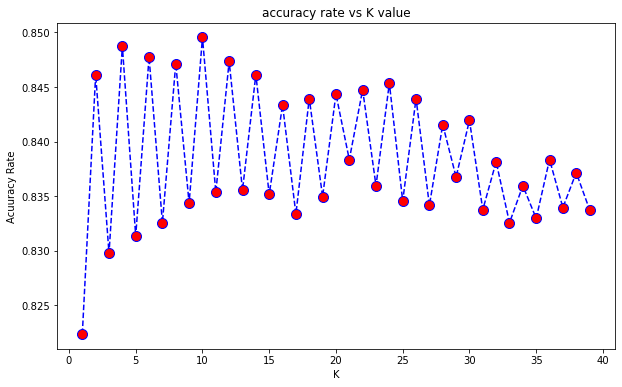

In [63]:
 plt.figure(figsize=(10,6))
 plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
 plt.title('accuracy rate vs K value')
 plt.xlabel('K')
 plt.ylabel('Acuuracy Rate')

In [68]:
mx = 0
N = -1
for i in range(1,40):
    if accuracy_rate[i-1] > mx:
        mx = accuracy_rate[i-1]
        N = i
print(mx)
print(N)

0.8495310317301936
10


In [69]:
knn = KNeighborsClassifier(N)
knn.fit(xv_train, y_train)

pred_knn = knn.predict(xv_test)

accuracy = m.accuracy_score(y_test, pred_knn)

#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

True Negative  1922
False Positive  579
False Negative  175
True Positive  2335
ACCURACY   :  0.8495310317301936
PRECISION  :  0.8013040494166095
RECALL     :  0.9302788844621513
F1_SCORE :  0.8609882005899704


### Hyperparameter tuning

In [65]:
acc =0
best_p=0
best_n=0
best_leaf=0
ct = 0
for p in range(1,3):
    for n in range(1, 16):
        for leaf in range(1,31):
            knn = KNeighborsClassifier(n_neighbors=n, leaf_size=leaf, p=p)
            knn.fit(xv_train, y_train) 
            curr = m.accuracy_score(y_test, knn.predict(xv_test))
            ct+=1
            print(ct, end = " ")
            if curr > acc :
                acc = curr
                best_leaf = leaf
                best_p = p
                best_n = n



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [66]:
knn = KNeighborsClassifier(n_neighbors=best_n, leaf_size=best_leaf, p = best_p)
knn.fit(xv_train, y_train)

pred_knn = knn.predict(xv_test)

accuracy = m.accuracy_score(y_test, pred_knn)

#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

True Negative  1886
False Positive  615
False Negative  131
True Positive  2379
ACCURACY   :  0.8511275194571942
PRECISION  :  0.7945891783567134
RECALL     :  0.947808764940239
F1_SCORE :  0.8644622093023254
